In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #The OS module in Python provides functions for interacting with the operating system
import matplotlib.pyplot as plt

In [2]:
###### import libraries
import librosa
import wave
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [3]:
def extract_mfcc(wav_file_name): #feature exatraction
    '''This function extracts mfcc features and obtain the mean of each dimension
    Input : path_to_wav_file
    Output: mfcc_features'''
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfccs

In [4]:
### extract audio data from Actors data
root_dir = "F:/raksha/rs15/audio_speech_actors_01-24/" 

audio_only_data = [] ###stores the mfcc data
audio_only_labels = [] ###stores the labels
for subdirs, dirs, files in os.walk(root_dir): #loading the data to the feature extracting algorithm
    for file in files:
        y, sr = librosa.load(os.path.join(subdirs,file))
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
        audio_only_data.append(mfccs)
        audio_only_labels.append(int(file[7:8]) - 1)
        print(mfccs)
        

[-6.9798456e+02  5.5228497e+01  3.2386318e-01  1.2775378e+01
  7.3961463e+00  8.6622381e-01 -3.5502753e+00 -2.8283312e+00
 -1.1305535e+01 -2.5249269e+00  4.9610427e-01 -2.7229261e+00
  1.6458002e+00 -3.4319646e+00  1.4035656e-01  1.0731596e+00
 -4.3556728e+00 -1.5837709e+00 -1.5930086e+00 -6.5936077e-01
 -6.2007318e+00 -2.6033127e-01 -2.5739810e+00 -4.2953482e+00
 -1.8979315e+00 -6.0985482e-01 -5.0588160e+00  4.4614413e-01
 -2.3297386e+00  3.1653246e-01 -2.1978128e+00 -1.9670634e+00
 -2.8553903e+00 -1.7034272e+00 -3.3283741e+00 -1.4314873e+00
 -1.1954842e+00 -1.6748068e+00 -3.5871480e+00 -1.4610072e+00]
[-6.9306982e+02  5.5734570e+01 -1.9197390e+00  1.6408991e+01
  8.4493570e+00  2.2073582e-01 -1.7383416e+00 -4.9312897e+00
 -1.1981821e+01 -9.9378014e-01  4.9410692e-01 -2.2968976e+00
  6.7870033e-01 -2.9393213e+00 -4.5076841e-01  7.3422897e-01
 -4.8240056e+00 -6.7738128e-01 -2.2330563e+00  8.2700962e-01
 -5.7397318e+00 -6.0418010e-01 -2.2600176e+00 -4.4663076e+00
 -8.7778610e-01 -1.4184

[-6.5640796e+02  6.2542297e+01 -2.6647284e+00  1.3251562e+01
  1.5033542e+00  1.6120902e-01 -5.9869690e+00 -6.9607515e+00
 -1.4088727e+01 -2.9940798e+00  2.0577931e+00 -6.6929259e+00
  1.6364715e+00 -3.8564537e+00 -9.3769407e-01  1.8680701e+00
 -7.0326991e+00 -1.7234800e+00 -1.2210057e+00 -3.0504961e+00
 -5.3268027e+00 -1.7330877e+00 -2.6274793e+00 -3.5544522e+00
 -2.6691067e+00 -2.4861071e-01 -5.3263583e+00  1.4012800e+00
 -2.8590302e+00 -5.8619750e-01 -2.6422276e+00 -2.1885760e+00
 -2.5968239e+00 -3.6029584e+00 -3.7565508e+00 -1.7384440e+00
 -1.8110704e+00 -1.1088150e+00 -3.7263355e+00 -2.1547797e+00]
[-6.5292865e+02  5.7447777e+01  2.7809253e-02  1.8713766e+01
  2.2407947e+00  8.3782607e-01 -2.9164302e+00 -5.8738260e+00
 -1.3817190e+01 -3.2190998e+00  2.4028318e-01 -4.2037730e+00
  2.2087364e+00 -3.8464592e+00 -1.1358416e+00  1.5417814e+00
 -7.6282043e+00 -1.9448464e+00 -1.5702255e+00 -2.2477148e+00
 -5.8663878e+00 -1.1357019e+00 -2.9160111e+00 -3.9655337e+00
 -3.1597178e+00  5.1762

[-5.4634155e+02  4.2903500e+01 -6.4077501e+00  1.3032622e+01
 -1.7944475e+00 -2.4094169e+00 -4.6959043e+00 -1.0791731e+00
 -1.2832336e+01 -4.4061770e+00 -1.2240132e+00 -4.4060798e+00
 -1.0650663e+00 -4.2613306e+00 -3.6232109e+00 -1.4658298e+00
 -6.5132771e+00 -1.5580256e+00 -4.2511716e+00 -3.0558782e+00
 -5.5948281e+00 -2.2901826e+00 -4.5864496e+00 -3.7538493e+00
 -3.5930252e+00 -1.0134542e+00 -5.1421967e+00  1.4926153e+00
 -2.4913545e+00 -6.0289586e-01 -1.9698492e-01 -1.9580139e-01
 -2.3513207e+00 -1.5422072e+00 -2.6378608e+00  1.2680033e-01
 -1.5312701e+00 -2.4021921e-01 -3.7465470e+00 -1.1404268e+00]
[-5.2653998e+02  4.0550125e+01 -5.8469238e+00  8.5310392e+00
 -3.8284848e+00 -3.2202516e+00 -7.4750590e+00 -8.1511793e+00
 -1.3546174e+01 -6.1477175e+00 -4.9182549e+00 -6.2467775e+00
 -3.8764508e+00 -4.3336859e+00 -4.9945526e+00 -2.6206167e+00
 -8.8129826e+00 -1.4486369e+00 -5.9414897e+00 -3.9319935e+00
 -4.9162083e+00 -2.3440003e+00 -2.4906754e+00 -9.4819570e-01
 -2.4819813e+00  8.7423

[-3.69863495e+02  3.96285248e+01 -1.58171148e+01 -4.44559544e-01
 -6.17439461e+00 -6.50129735e-01 -1.05102634e+01 -1.78285923e+01
 -1.82713413e+01 -8.98749638e+00 -4.19607687e+00 -7.47655249e+00
 -8.19632912e+00 -6.90638971e+00 -6.79916811e+00  5.32783842e+00
 -8.97728825e+00 -5.26586246e+00 -2.39174318e+00 -2.87034154e+00
 -4.60800982e+00  2.17313483e-01 -7.28341118e-02  3.40296197e+00
  5.95026875e+00  1.10416975e+01  5.12248135e+00  6.80080605e+00
  4.34695631e-01  8.34814310e-01  1.78625500e+00  3.67909145e+00
  3.10724330e+00  1.08348370e+00 -3.04563665e+00  2.32776737e+00
  3.64394903e+00  3.11877084e+00 -5.29986203e-01 -3.58523816e-01]
[-427.36496      45.678745    -15.949531     -0.6474935    -1.2069638
    2.4827278   -14.023707    -15.020878    -17.594843     -9.059506
    1.8709937    -7.0012736    -7.830113     -5.646576     -4.4122114
    4.3994074    -8.909101     -6.0498905    -1.3112698    -3.8375552
   -6.5484996    -0.94025356   -0.46537668    2.0281265     2.5278986


[-6.0545587e+02  5.1441818e+01 -5.8208904e+00  8.9703798e+00
  3.7160838e+00 -2.2610722e+00 -8.3884268e+00 -5.9210758e+00
 -1.1399496e+01 -4.3412223e+00  5.3028107e-02 -7.4543819e+00
 -2.4496944e-01 -3.4351161e+00 -5.2712960e+00  1.0704234e+00
 -8.9633904e+00 -3.9963431e+00 -3.5688951e+00 -4.1511216e+00
 -5.9741168e+00 -2.0245826e+00 -4.6929684e+00 -6.0004573e+00
 -3.1563532e+00 -1.8720460e+00 -5.5641093e+00  8.9704551e-02
 -2.7200062e+00 -3.6035731e-02 -1.5213649e+00  2.3532957e-01
 -6.8050063e-01 -4.1629401e-01 -1.2222270e+00  7.7847093e-01
  1.9343028e-02  1.5924913e-01 -2.2483394e+00 -6.3968146e-01]
[-5.5343481e+02  4.2341782e+01 -5.6205363e+00  7.7216330e+00
 -3.3795825e-01 -2.9505711e+00 -7.0432630e+00 -7.1788578e+00
 -1.1853998e+01 -6.2996240e+00 -1.6240139e+00 -6.2781715e+00
 -2.2950742e+00 -2.9706755e+00 -7.0339656e+00 -3.8205177e-01
 -8.4934502e+00 -4.7335534e+00 -3.1163960e+00 -4.0648084e+00
 -5.8797460e+00 -2.5954161e+00 -4.4032598e+00 -5.3318233e+00
 -2.2688746e+00 -1.3100

[-6.5176178e+02  4.1654034e+01 -7.1342940e+00  1.3726697e+00
 -7.8175092e+00 -2.1355245e+00 -9.2365236e+00 -1.1093528e+01
 -8.5988960e+00 -2.4836566e+00 -7.5757565e+00 -8.1544323e+00
 -8.5244598e+00 -1.1424088e+00 -9.3797522e+00 -3.0616353e+00
 -5.2455230e+00 -3.4484704e+00 -6.2211356e+00 -3.8624816e+00
 -3.2193389e+00 -5.9577513e+00 -2.2849834e+00 -8.2940155e-01
 -2.6513038e+00  2.5106380e+00  3.1815581e+00  4.7563891e+00
  5.1949506e+00  4.6622443e+00  2.5495124e+00  4.7921348e+00
  1.5295962e+00  3.8153956e+00  2.8999851e+00  6.2322354e+00
  6.3937491e-01  2.3602736e+00 -1.1408528e+00  9.9274981e-01]
[-6.5749414e+02  4.7748779e+01 -5.3763347e+00  3.5762169e+00
 -6.7308073e+00 -1.4113307e+00 -8.2520380e+00 -9.8820267e+00
 -6.8047628e+00 -9.0638971e-01 -6.4055796e+00 -8.3626328e+00
 -8.9210663e+00 -9.1798127e-02 -9.1391640e+00 -2.9517667e+00
 -6.2709494e+00 -3.3698382e+00 -6.3357029e+00 -4.1916728e+00
 -4.5758300e+00 -6.5577135e+00 -3.1486764e+00 -2.6426013e+00
 -3.5695412e+00  1.3791

[-6.6063208e+02  4.7767838e+01 -1.0136259e+01  6.3656754e+00
 -9.2698774e+00 -6.1767459e+00 -1.0420731e+01 -1.3701454e+01
 -9.6709509e+00 -3.7259297e+00 -8.1824188e+00 -2.2050087e+00
 -7.3108768e+00  3.3797307e+00 -5.2996554e+00 -5.3303514e+00
 -3.2995286e+00 -9.4863880e-01 -3.5707827e+00  7.2482102e-02
  3.8439503e-01  3.7347455e-02 -4.8666319e-01  3.8055239e+00
  4.8435874e+00  4.8652859e+00  6.2059321e+00  2.7814739e+00
  1.6078188e+00 -1.5130526e-01 -2.8726242e+00  1.9119151e+00
  4.5129243e-01  1.2819610e+00 -2.2555032e+00 -5.7734117e-02
 -2.4467275e+00 -2.9124741e-02 -2.2078102e+00 -4.4418022e-01]
[-6.7828119e+02  5.4174152e+01 -5.9321070e+00  8.3572216e+00
 -5.2659736e+00 -4.1651201e+00 -1.0403088e+01 -1.1640510e+01
 -9.4754620e+00 -3.1103890e+00 -7.2031732e+00 -2.9418533e+00
 -7.0732656e+00 -3.3620438e-01 -5.6122479e+00 -3.2582049e+00
 -2.9917932e+00 -5.4423183e-01 -5.1888890e+00 -1.3197773e+00
 -2.5396347e+00 -1.7040216e+00 -1.5060133e+00  1.5718325e+00
  2.0753112e+00  2.0216

[-5.6627905e+02  3.1739712e+01 -2.5009485e+01  2.7551711e+00
 -9.9142065e+00 -8.5483847e+00 -1.0887056e+01 -1.5915459e+01
 -5.7238145e+00 -3.1576867e+00 -9.4365549e+00 -3.2661915e+00
 -7.2694168e+00  2.3961699e+00 -7.8052325e+00 -3.7419715e+00
 -3.8440547e+00 -1.3589278e+00 -7.6438606e-02  6.8286948e+00
  7.3794799e+00  7.1053696e+00  5.1551027e+00  6.5145593e+00
  2.3173556e+00  5.2519429e-01  4.1178994e+00  1.8221545e+00
  3.2867080e-01  3.9263643e-02 -4.2148347e+00  7.2294647e-01
 -2.4622641e+00 -1.1165856e+00 -1.8246669e+00 -6.6998440e-01
 -3.0851212e+00  3.7311941e-01 -7.7641332e-01  1.3101234e+00]
[-5.7024261e+02  2.9644203e+01 -2.8982492e+01 -7.5986075e-01
 -9.3784313e+00 -1.0253148e+01 -1.4022274e+01 -1.8755644e+01
 -5.1641397e+00 -3.2630379e+00 -1.0700114e+01 -5.4496193e+00
 -5.3277197e+00  3.2416356e+00 -9.2321644e+00 -3.1007721e+00
 -3.7687726e+00  4.2299619e-01  4.9186387e+00  1.2910772e+01
  1.4069929e+01  9.9121361e+00  4.4027219e+00  4.5000157e+00
 -2.0986490e+00 -2.5382

[-5.7830701e+02  3.8901981e+01 -1.4954566e+01  1.0497827e+01
 -7.7063236e+00 -6.9093018e+00 -3.5080743e+00 -5.5305433e+00
 -3.5088940e+00 -3.2169704e+00 -4.5015354e+00 -4.3598251e+00
 -3.6524019e+00  2.1203122e+00 -2.3199706e+00  2.7387459e+00
 -1.1537772e+00  4.2615004e-02 -1.3375186e+00  2.6858513e+00
  3.4261819e-02 -5.3999263e-01 -2.2651408e+00  4.3008053e-01
  1.0532752e-01  1.5447289e+00  3.4379523e+00  3.4539728e+00
  3.6977131e+00  5.5967975e+00  3.2860465e+00  4.4342828e+00
  3.1332046e-02  2.7771068e+00  1.7338716e+00  4.4733438e+00
  3.4733751e-01  2.6040137e+00  9.6907365e-01  1.7995063e+00]
[-6.04192017e+02  4.07116356e+01 -1.81544380e+01  5.27461529e+00
 -7.44322777e+00 -6.23931742e+00 -3.77109432e+00 -7.55167818e+00
 -6.35485697e+00 -4.55004454e+00 -7.17284822e+00 -2.83202243e+00
 -5.67904663e+00  8.16977203e-01 -2.82273507e+00 -2.78477818e-01
 -2.55735493e+00 -8.80060315e-01 -2.89284587e+00  1.26570404e+00
 -1.02849044e-01 -8.93307447e-01 -2.59068966e+00 -2.61150742e+00

In [5]:
#### convert data to array and make labels categorical
audio_only_data_array = np.array(audio_only_data)
audio_only_labels_array = np.array(audio_only_labels)
audio_only_data_array.shape

(120, 40)

In [6]:

for actor_dir in sorted(os.listdir(root_dir)):
    actor_name = os.path.join(root_dir, actor_dir)
    for file in os.listdir(actor_name):
        audio_only_labels.append(int(file[7:8]) - 1)
        wav_file_name = os.path.join(root_dir, actor_dir, file)
        audio_only_data.append(extract_mfcc(wav_file_name))

In [7]:
#### convert data to array and make labels categorical
audio_only_data_array = np.array(audio_only_data)
audio_only_labels_array = np.array(audio_only_labels) 
audio_only_data_array.shape # Display the total size 

(240, 40)

In [8]:

data = np.r_[audio_only_data_array,audio_only_data_array]
labels = np.r_[audio_only_labels_array,audio_only_labels_array]

labels.shape

(480,)

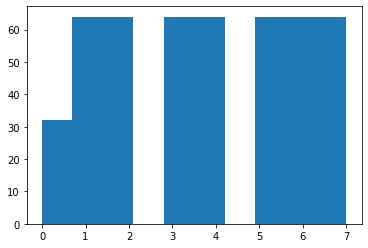

In [9]:
### plot a histogram to understand the distribution of the data
import matplotlib.pyplot as plt
plt.hist(labels)
plt.show()

In [10]:
### make categorical labels to optimize the data
labels_categorical = to_categorical(labels) #Categorical is a collection of information that is divided  data into groups and lables
data.shape
labels_categorical.shape # categorical is a variable that can take on one at a time

(480, 8)

In [11]:
number_of_samples = data.shape[0]      # total number of samples 
training_samples = int(number_of_samples * 0.8) # number of sample used in training
validation_samples = int(number_of_samples * 0.1) # validating training data with number of samples
test_samples = int(number_of_samples * 0.1) # testing the samples

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [13]:
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

Converted Audio Is : 
kids talking by the door


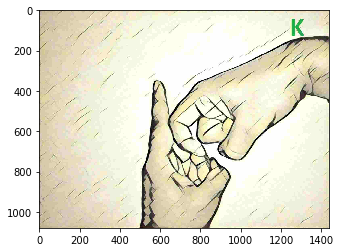

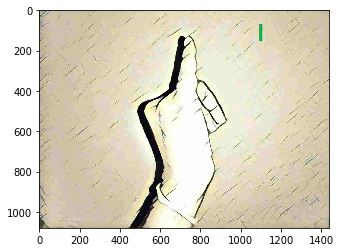

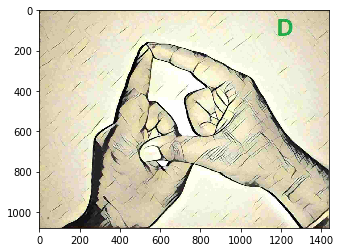

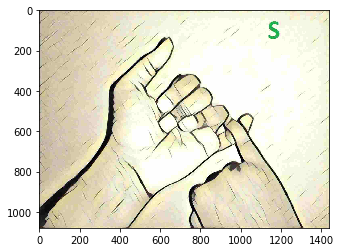

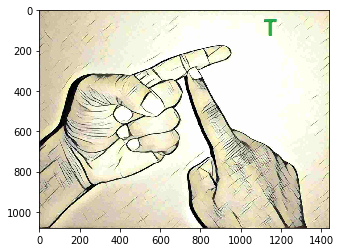

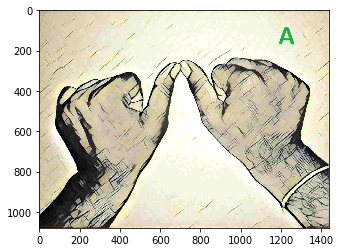

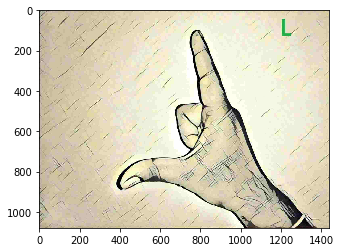

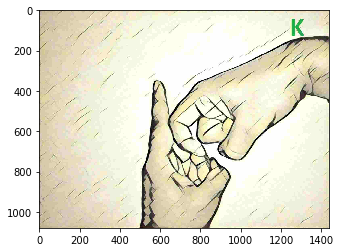

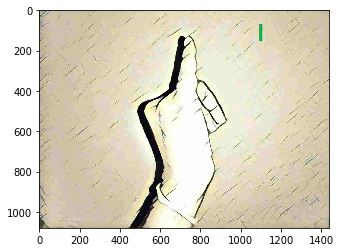

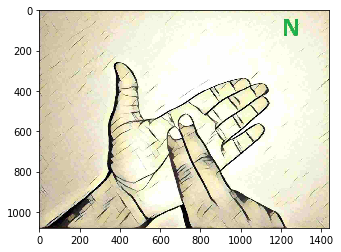

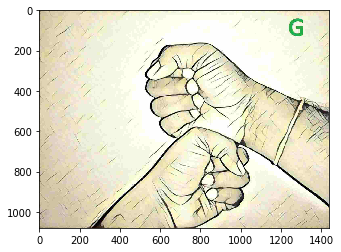

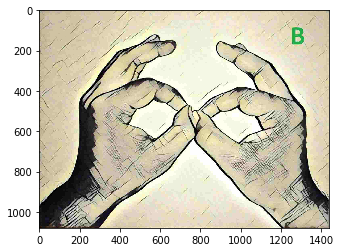

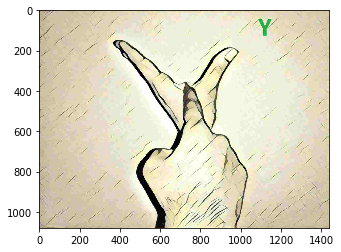

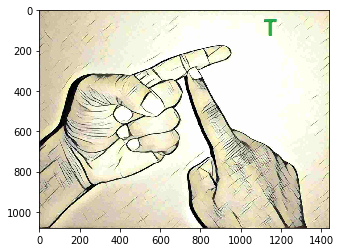

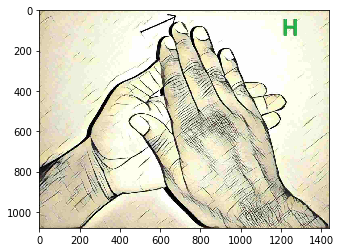

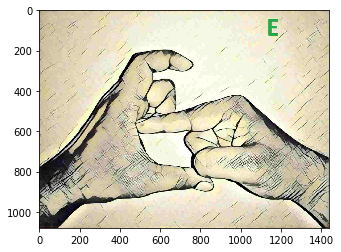

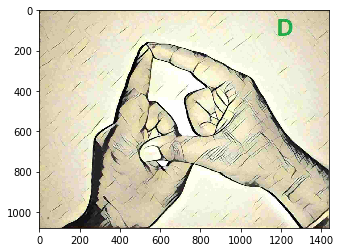

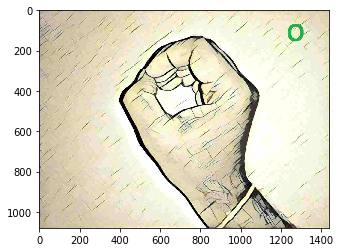

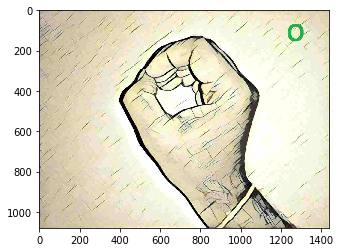

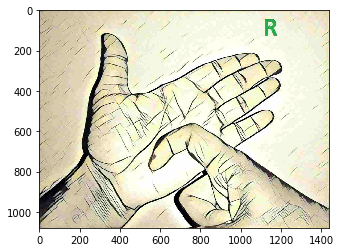













(1, 40, 1)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 384 samples, validate on 48 samples
Epoch 1/15
384/384 [==============================] - 5s 12ms/step - loss: 3.5975 - acc: 0.1276 - val_loss: 2.0271 - val_acc: 0.1667
Epoch 2/15
384/384 [==============================] - 0s 243us/step - loss: 2.2334 - acc: 0.1016 - val_loss: 2.2297 - val_acc: 0.1042
Epoch 3/15
384/384 [==============================] - 0s 231us/step - loss: 1.9774 - acc: 0.2500 - val_loss: 1.9690 - val_acc: 0.2708
Epoch 4/15
384/384 [==============================] - 0s 251us/step - loss: 1.8578 - acc: 0.3021 - val_loss: 1.9701 - val_acc: 0.2500
Epoch 5/15
384/384 [==============================] - 0s 221us/step - loss: 1.7695 - acc: 0.4010 - val_loss: 1.8975 - val_acc: 0.3542
Epoch 6/15
384/384 [==============================] - 0s 249us/step - loss: 1.6877 - acc: 0.4557 - val_loss: 1.8414 - val_acc: 0.3542
Epoch 7/15
384/384 [=============

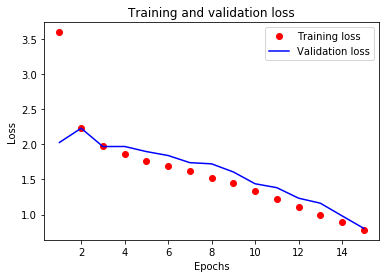

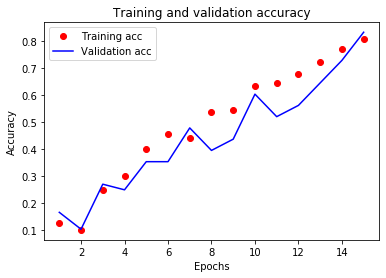

In [14]:
import cv2
from easygui import *  # Easy GUI provides an easy to use interface for simple GUI interaction with a user
from PIL import Image, ImageTk # Python Imaging Library adds many image processing features to Python
from itertools import count
import tkinter as tk  # Tkinter package is the standard python interface to the Tk GUI toolkit
import speech_recognition as sr
import string
from tkinter.filedialog import askopenfilename # to retreive file from the system
from playsound import playsound
from keras.models import Sequential
from keras.layers import *

from tkinter import *
from keras.models import Sequential
from keras.layers import *
import keras 
import librosa

import PIL.Image,PIL.ImageTk
import PIL.Image
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight


def model_B():
    ''' CNN model definition and architecture
    The model returned here is referred to as model B
    Two activation functions used are --> RELU and SOFTMAX
    Dense - 
    Maxpooling - 
    
    ''' 
    #classifier CNN can be used in classification, to classify the data as training and tseting input to the sequential model
 #   model =evaluate()
    model = Sequential()
    model.add(Conv1D(8, kernel_size = 3, input_shape=(40, 1)))
    model.add(Activation('relu'))    #rectified linear unit-the purpose of applying the rectifier function is to increase the non-linearity in our data
    model.add(Conv1D(16,kernel_size = 3))
    model.add(Activation('relu'))   #the usage of relu helps to prevent the exponential growth in the computation required to operate the neural network
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(32, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(Conv1D(16, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(8))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  
    return model


def Predict_B():
    ''' Prediction using model B'''
    mfcc = extract_mfcc(e.get()) #extracting the feature of mfcc by providing input from system
    model = model_B()
    model.load_weights("F:/raksha/rs15/Audio_emotion_recognition-master/Model_B.h5")  #pre-trained models of CNN
    mfcc = np.expand_dims(mfcc, -1) #is a scale that relates the perceived frequency of a tone to the actual measured frequency
    mfcc = np.expand_dims(mfcc, 0) #is a scale that relates the perceived frequency of a tone to the actual measured frequency
    print(mfcc.shape)
    cls_wav = model.predict_classes(mfcc) #prints shape of the each input data of feature extraction
    

    

def extract_mfcc(wav_file_name): #defining the feature extraction function
    ''' Extracts mfcc features and outputs the average of each dimension'''
    y, sr = librosa.load(wav_file_name) #loading the data into the file 
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0) #loading the actual measuring frequency
    return mfccs


def func():
    #selecting the audio in the file 
        sound = filedialog.askopenfilename(filetypes=(("Audio Files", ".wav .ogg"),   ("All Files", "*.*")))
        r = sr.Recognizer() 
        isl_gif=[]
                
        arr=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
        
        with sr.AudioFile(sound) as source:
                r.adjust_for_ambient_noise(source)  #which takes human voices to convert into text or it can take recorded voices
                i=0
                audio = r.listen(source) #passing selected file object audio

                try:
                    #Converting speech to text using sphinx
                    print("Converted Audio Is : \n" + r.recognize_google(audio)) #here sphinx acts as recognizing speech to convert to text
                    a=r.recognize_google(audio) 
                                                     
                    for c in string.punctuation:
                        a= a.replace(c,"")
                        break            
                    if(a.lower()=='goodbye'):
                        print("oops!Time To say good bye")
                        
                        #below complete code difines and complete working of recorded audio selection and converting it into text than assigning the text into the feature of letters
                        #it defines passing audio data into feature extraction method and assinging  to prediction by the cnn model that is specfied as model b 
                        
                                 
                    elif(a.lower() in isl_gif):
        
                        class ImageLabel(tk.Label):
                            """a label that displays images, and plays them if they are gifs"""
                            def load(self, im):
                                if isinstance(im, str):
                                    im = Image.open(im)
                                self.loc = 0
                                self.frames = []

                                try:
                                    for i in count(1):
                                        self.frames.append(ImageTk.PhotoImage(im.copy()))
                                        im.seek(i)
                                except EOFError:
                                    pass

                                try:
                                    self.delay = im.info['duration']
                                except:
                                    self.delay = 100
                                    if len(self.frames) == 1:
                                        self.config(image=self.frames[0])
                                    else:
                                        self.next_frame()

                            def unload(self): #loading each letters to the output by configuring thespeech into text
                                self.config(image=None)
                                self.frames = None

                            def next_frame(self): #it shows the frame representation into tkinter
                                if self.frames:
                                    self.loc += 1
                                    self.loc %= len(self.frames)
                                    self.config(image=self.frames[self.loc])
                                    self.after(self.delay, self.next_frame)

                        root = tk.Tk()
                        lbl = ImageLabel(root)
                        lbl.pack()
                        lbl.load(r'/home/shubh/Videos/ISL_CODE/ISL/ISL_Gifs/{0}.gif'.format(a.lower()))
                                             
                        start = Button(lbl,text = "Browse Files",command = func)
                        start.grid(column = 1, row = 2)
                        root.mainloop()
                    else:

                        for i in range(len(a)):
                            #comparing the letters with the images 
                            if(a[i] in arr):
                                            
                                ImageAddress = 'F:/raksha/r10/Speech-to-Indian-Sign-Language-Translator-master/letters/'+a[i]+'.jpg' # image address
                                ImageItself = Image.open(ImageAddress) #used to open exact image of data
                                ImageNumpyFormat = np.asarray(ImageItself) #coneverting each data into array 
                                plt.imshow(ImageNumpyFormat) #showing images
                                plt.draw()
                                plt.pause(0.8) # pause how many seconds
                                
                                plt.close()

                            else:
                                continue
                                
                        ''' Prediction using model B'''
                        #MFCC takes into account human perception for sensitivity at appropriate frequencies by converting the conventional frequency to Mel Scale
                        mfcc = extract_mfcc(sound)  # these mfcc is suitable for understanding humans and the frequency at which humans speach
                        model = model_B()
                        model.load_weights("F:/raksha/rs15/Audio_emotion_recognition-master/Model_B.h5")
                        mfcc = np.expand_dims(mfcc, -1)#is a scale that relates the perceived frequency of a tone to the actual measured frequency
                        mfcc = np.expand_dims(mfcc, 0)
                        print(mfcc.shape)
                        cls_wav = model.predict_classes(mfcc)
                        #The MFCC feature extraction technique basically includes windowing the signal, applying the cnn, taking the data of the magnitude, and then warping it
                    
                        callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
                        #model_B is having pre-trained values                
                        Predict_B = model_B()
                        #We can divide the sequence into multiple input/output patterns called samples, where three time steps are used as input and one time is used as output for the one time prediction
                        history = Predict_B.fit(np.expand_dims(data[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(data[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]),verbose=1,callbacks = [MetricsCheckpoint('logs')], epochs=15, shuffle=True)
     
       
                        
              
                        print('\n', 'Accuracy using cnn:',history.history['val_acc'],'\n')
                        
                        score=history.history['val_acc']
                      
                        
                        print('\n', 'Final Accuracy using cnn:',score[14],'\n')
            
        
        
                        
                        
                        loss = history.history['loss']
                        val_loss = history.history['val_loss']

                        epochs = range(1, len(loss) + 1)

                        plt.plot(epochs, loss, 'ro', label='Training loss')
                        plt.plot(epochs, val_loss, 'b', label='Validation loss')
                        plt.title('Training and validation loss')
                        plt.xlabel('Epochs')
                        plt.ylabel('Loss')
                        plt.legend()

                        plt.show()
                        
                        
                        plt.clf()                                                
                        acc = history.history['acc']
                        val_acc = history.history['val_acc']
                        epochs = range(1, len(acc) + 1)
                        plt.plot(epochs, acc, 'ro', label='Training acc')
                        plt.plot(epochs, val_acc, 'b', label='Validation acc')
                        plt.title('Training and validation accuracy')
                        plt.xlabel('Epochs')
                        plt.ylabel('Accuracy')
                        plt.legend()

                        plt.show()
                        
    
                
                
                except Exception as e:
                    print("Error {} : ".format(e) )
                    plt.close()


def playAudio():
    ''' Play the audio file '''
    playsound(e.get()) # to retrieve audio files

if __name__ == "__main__": #main fuction which is responsible for tkinter running
    
  image   = "F:/raksha 2021/Automatic-Sign-Language-master/signlang.png"
  msg="HEARING IMPAIRMENT ASSISTANT"
  choices = ["start","exit"] #tkinker buttons

 
  reply   = buttonbox(msg,image=image,choices=choices)
  if reply ==choices[0]:
        func() #above function that slects audio and converts into mfcc feature than to test and predict accuracy
  if reply ==choices[1]:
        playAudio()
